C:\Users\diego\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


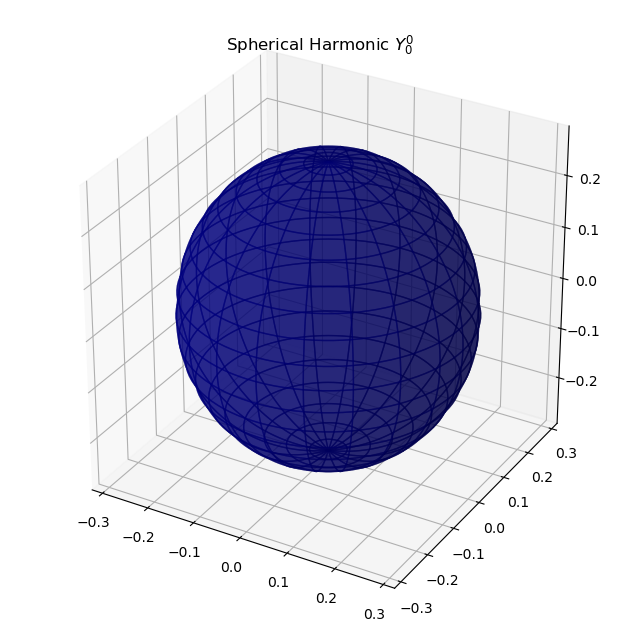

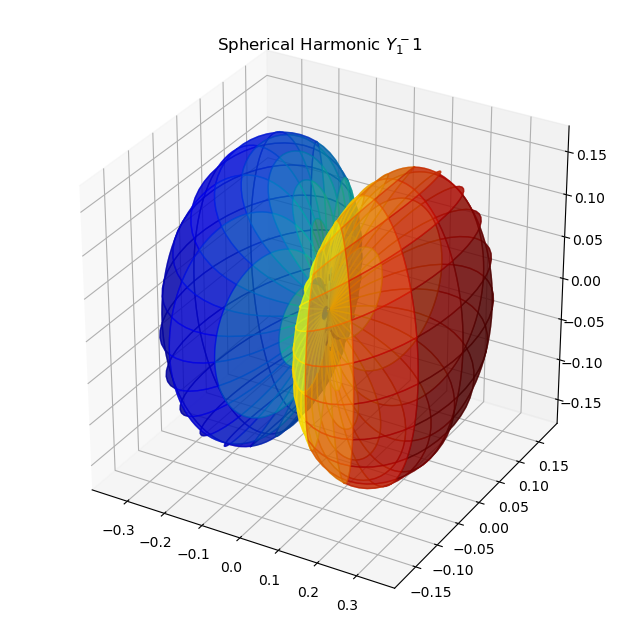

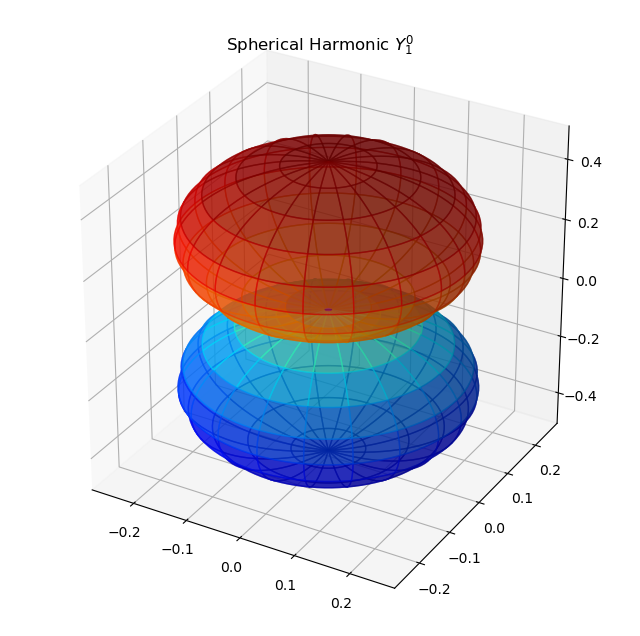

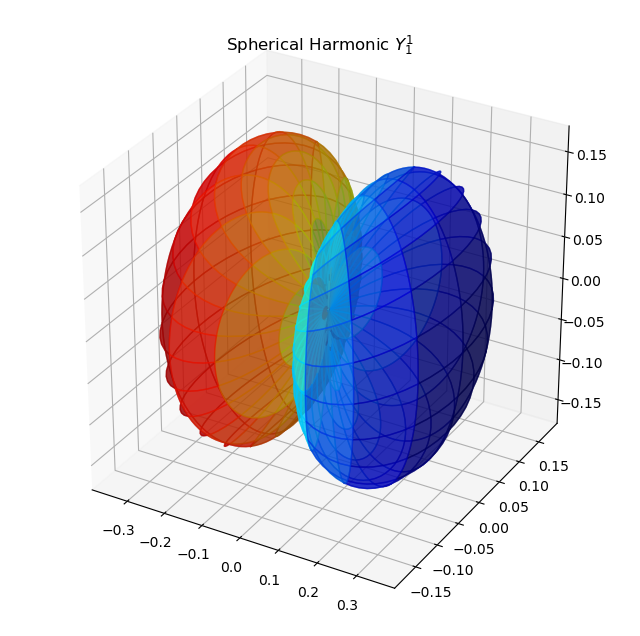

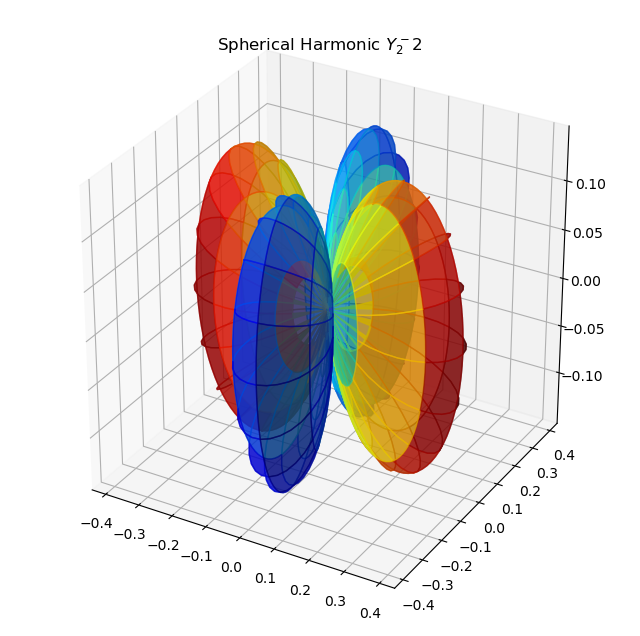

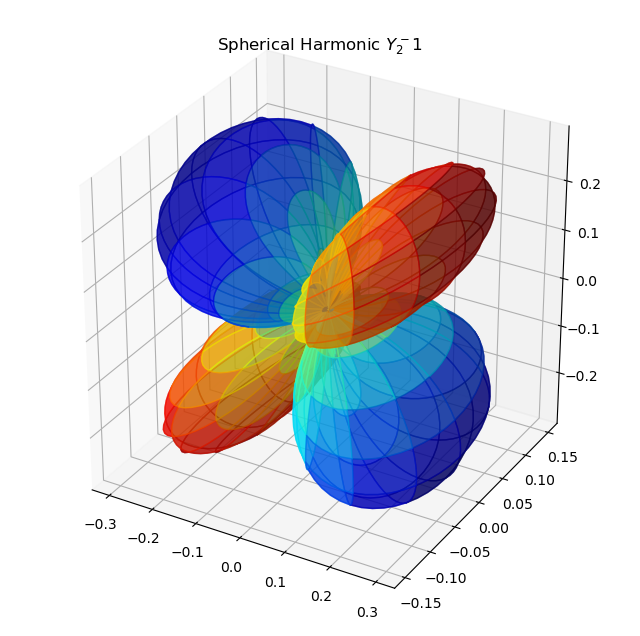

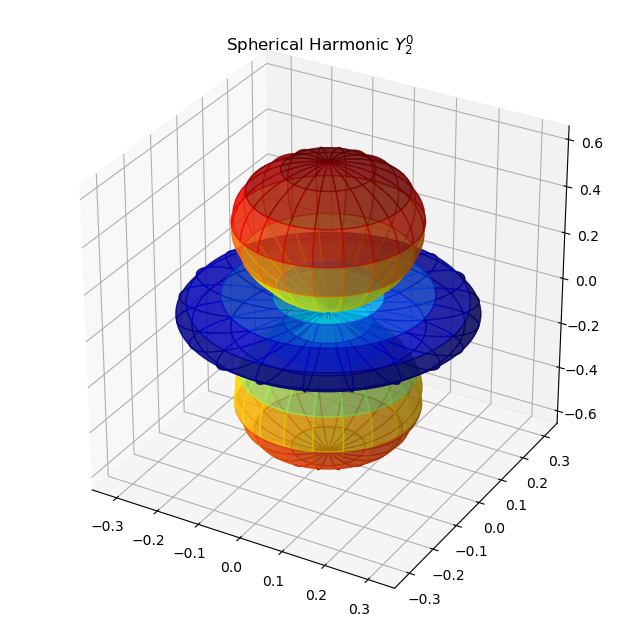

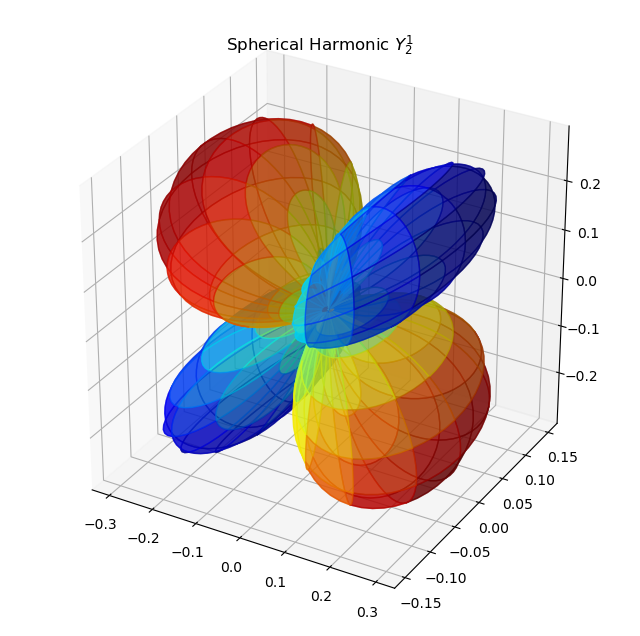

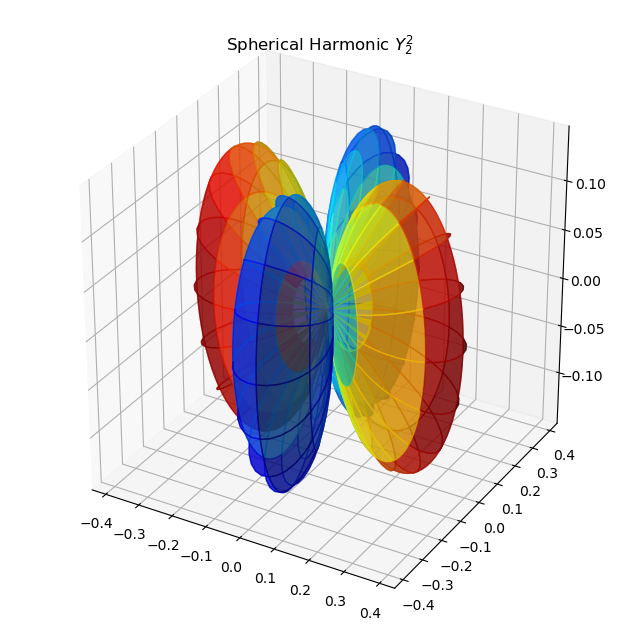

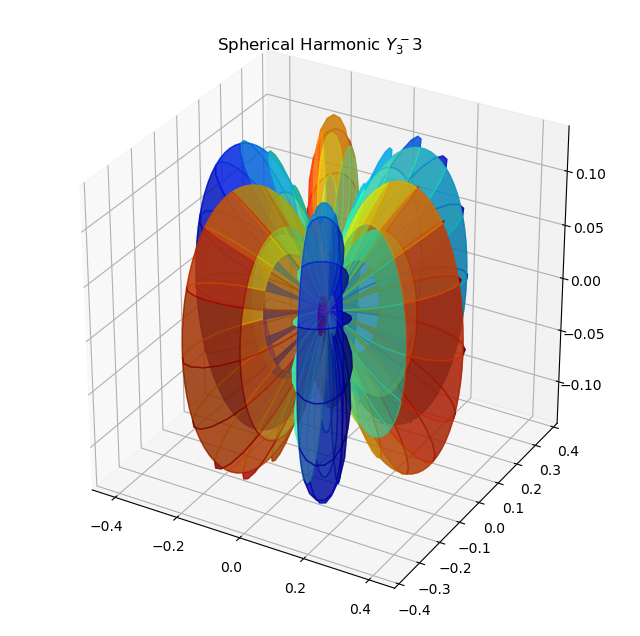

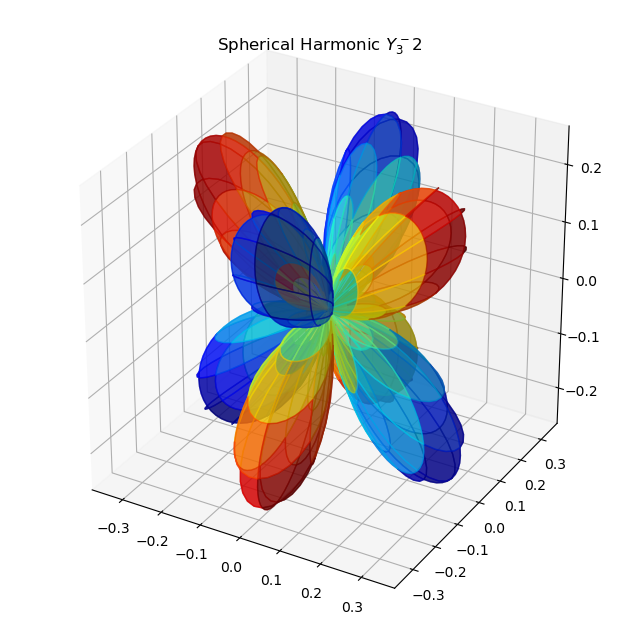

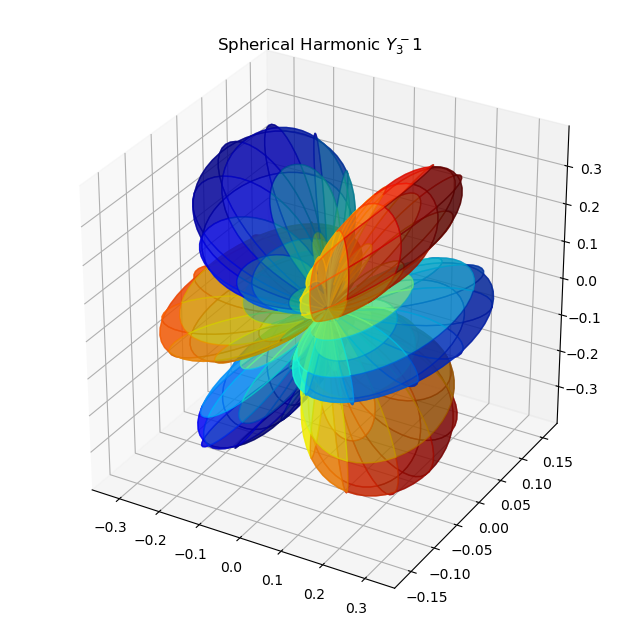

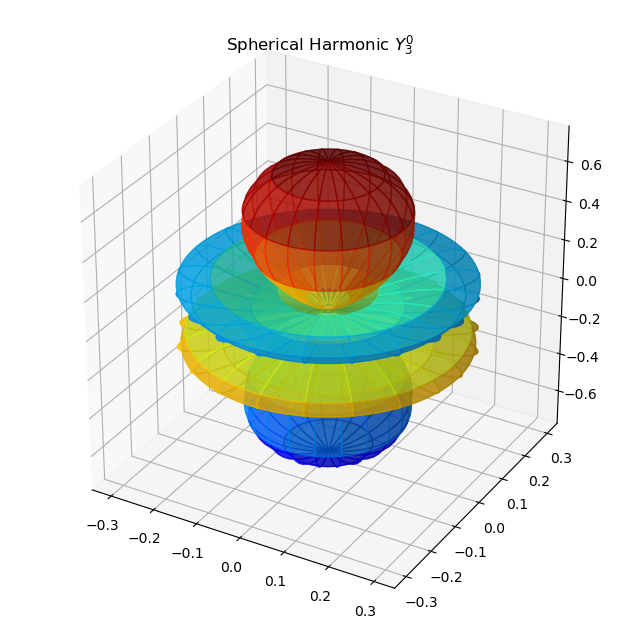

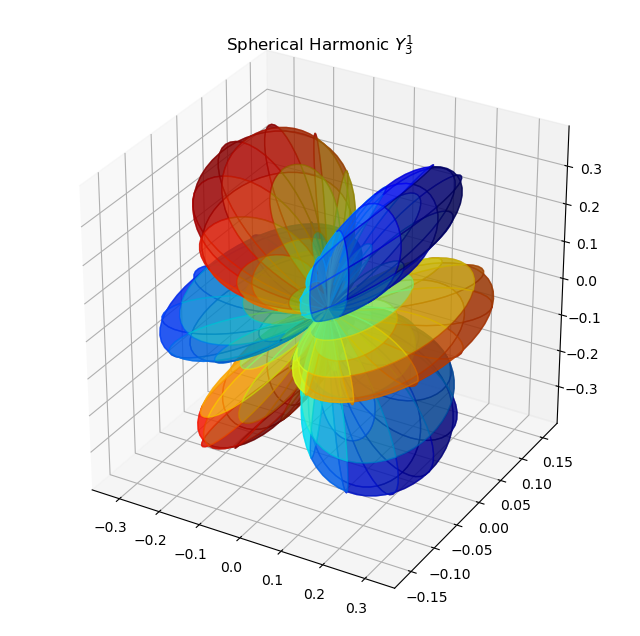

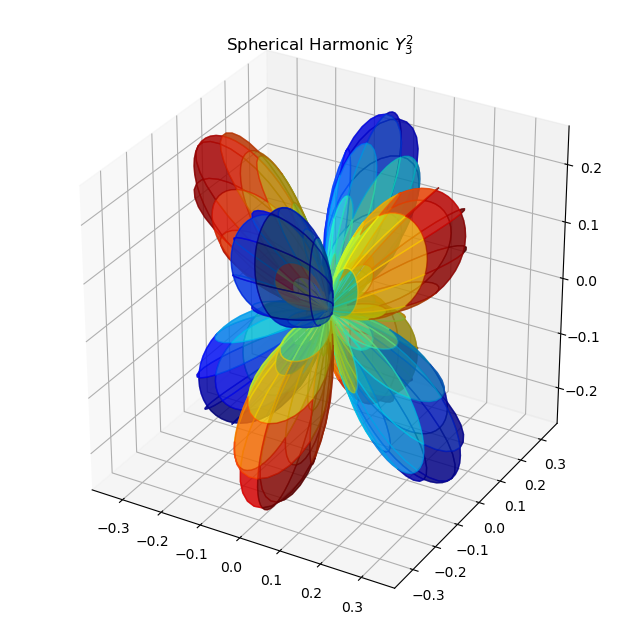

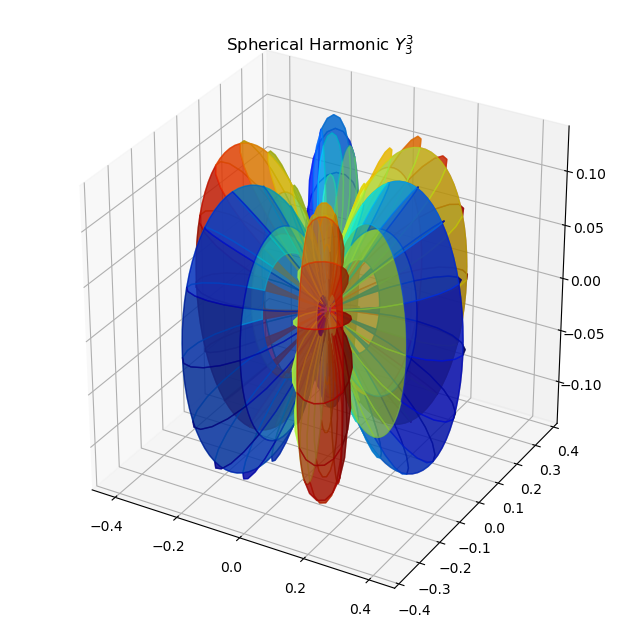

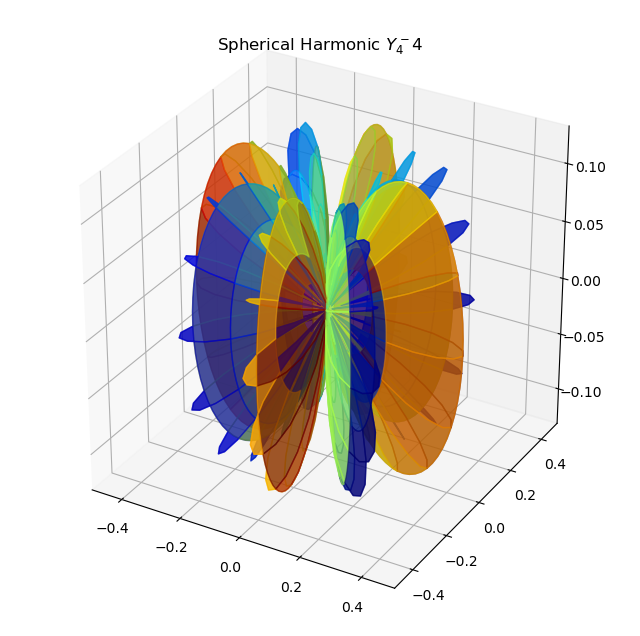

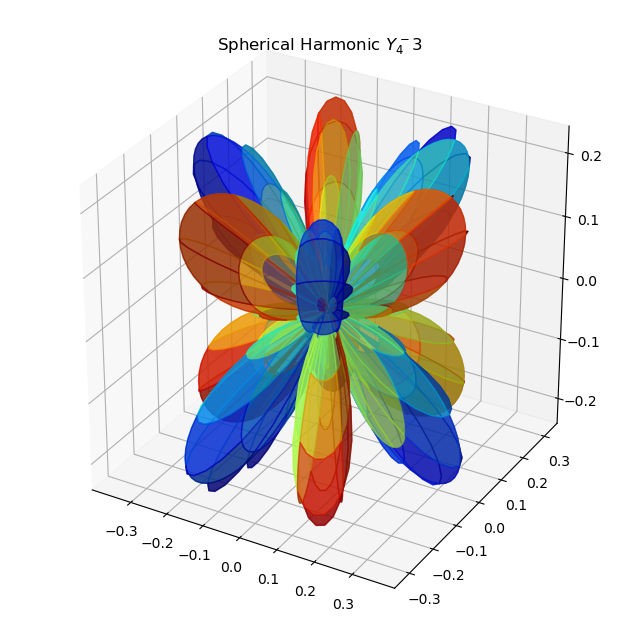

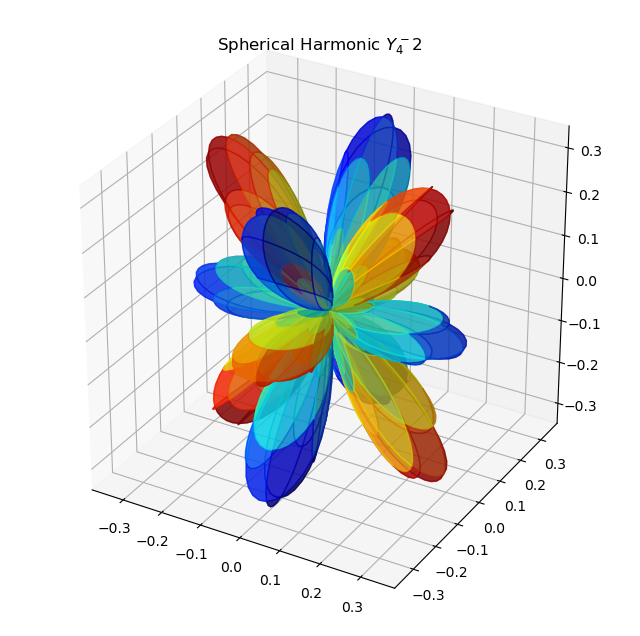

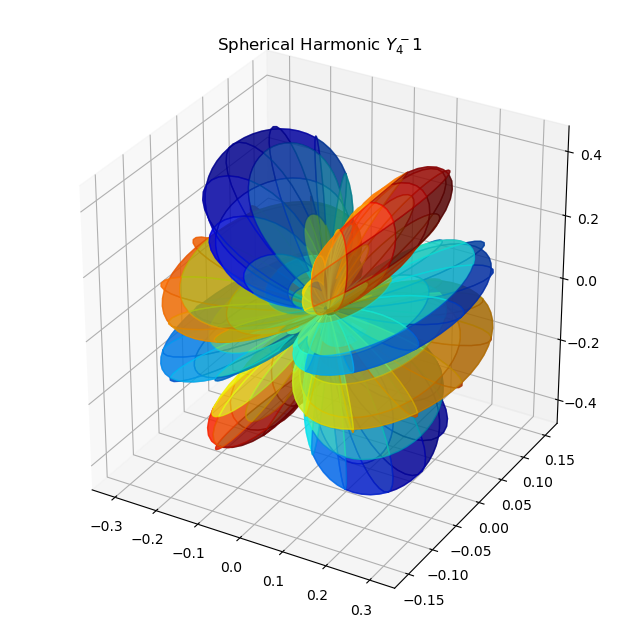

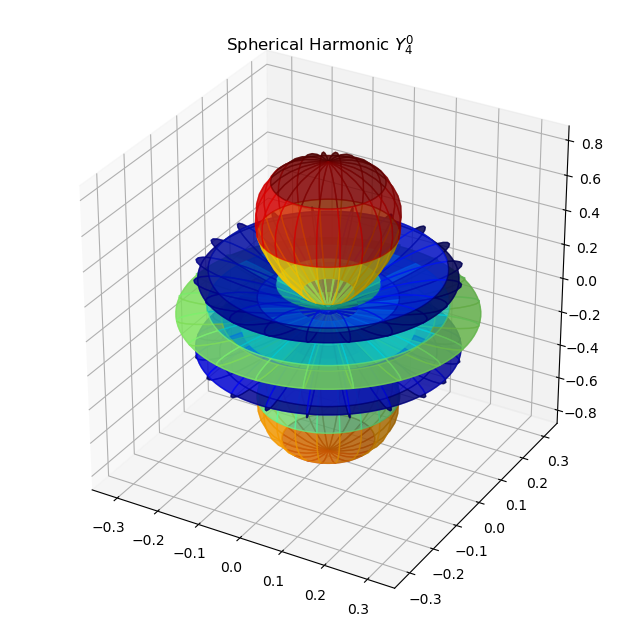

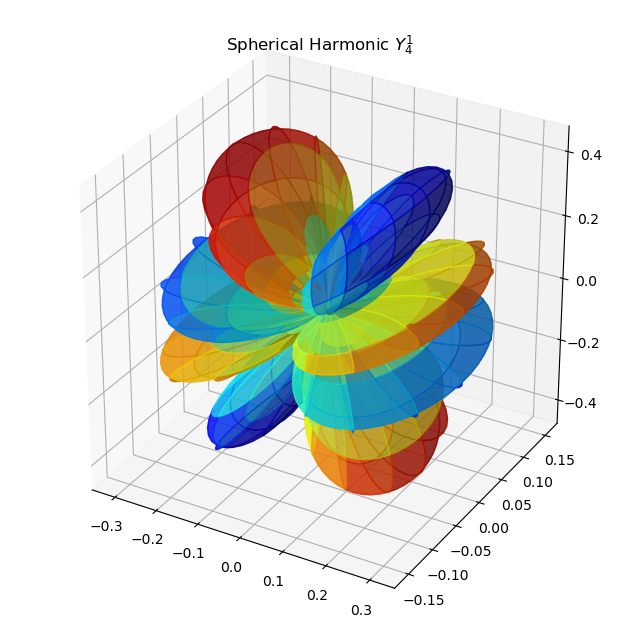

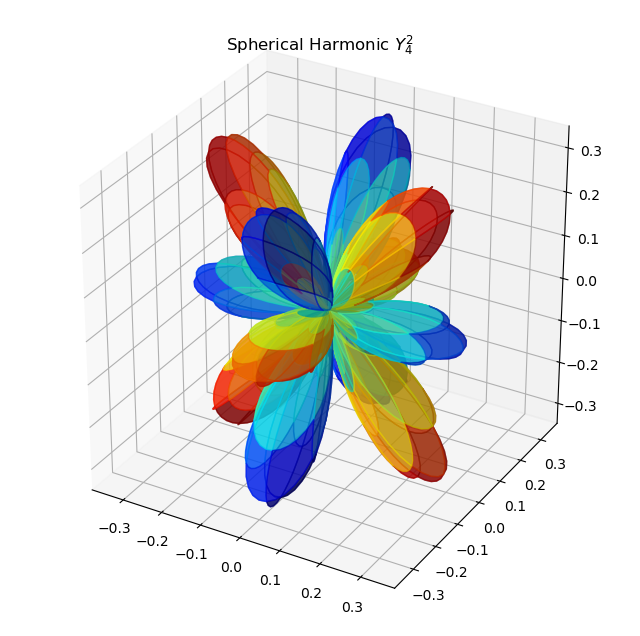

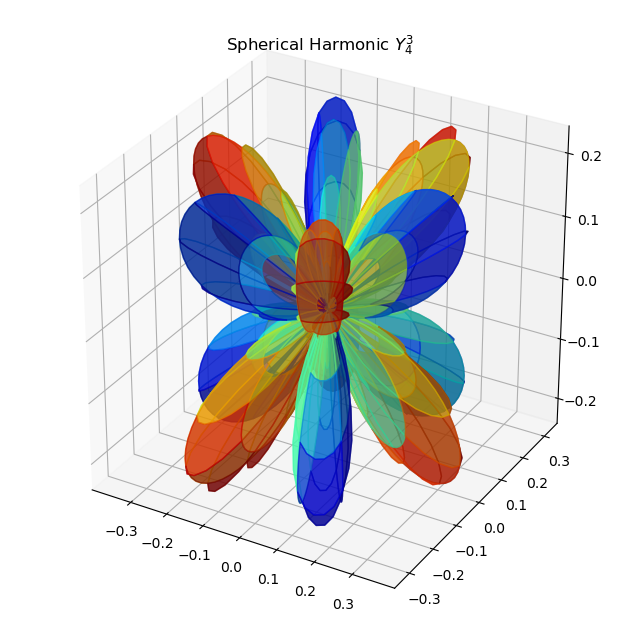

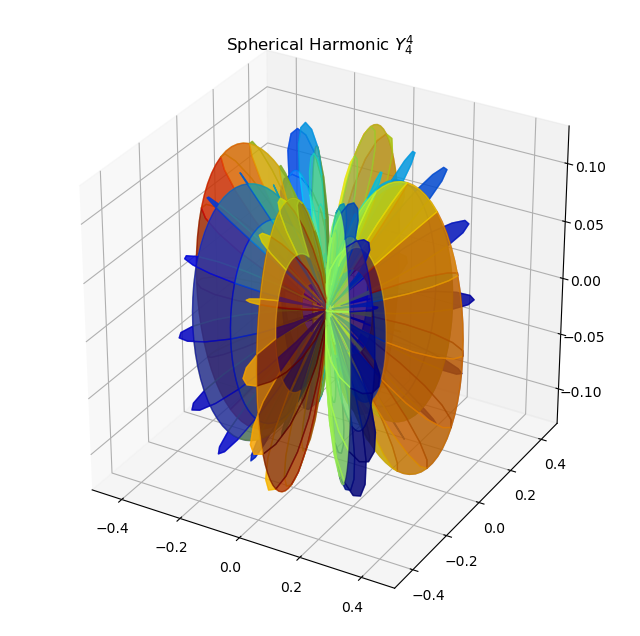

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm

# Define a grid for theta and phi
theta_values = np.linspace(0, np.pi, 100)
phi_values = np.linspace(0, 2 * np.pi, 100)
theta_grid, phi_grid = np.meshgrid(theta_values, phi_values)

# Generate and plot spherical harmonics for specified values
for l_val in range(5):  # l ranges from 0 to 3
    for m_val in range(-l_val, l_val + 1):
        # Compute the spherical harmonic
        Y_lm_values = sph_harm(m_val, l_val, phi_grid, theta_grid)

        # Get the real part of the spherical harmonic
        Y_lm_real = np.real(Y_lm_values)

        # Normalize the spherical harmonic values for color mapping
        Y_lm_real_normalized = (Y_lm_real - Y_lm_real.min()) / (Y_lm_real.max() - Y_lm_real.min())

        # Convert spherical coordinates to Cartesian coordinates for plotting
        X = np.abs(Y_lm_real) * np.sin(theta_grid) * np.cos(phi_grid)
        Y = np.abs(Y_lm_real) * np.sin(theta_grid) * np.sin(phi_grid)
        Z = np.abs(Y_lm_real) * np.cos(theta_grid)

        # Plot the spherical harmonics
        fig = plt.figure(figsize=(8, 8))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(X, Y, Z, rstride=5, cstride=5, facecolors=plt.cm.jet(Y_lm_real_normalized), edgecolor='k', alpha=0.6)
        ax.set_title(f'Spherical Harmonic $Y_{l_val}^{m_val}$')
        plt.show()
